<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.04-Computation-on-arrays-aggregates.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [8]:
import numpy as np

In [9]:
L = np.random.random(100)
sum(L)

47.79338664116794

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [10]:
np.sum(L)

47.79338664116797

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [11]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

246 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
616 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [12]:
min(big_array), max(big_array)

(1.0725582985093851e-06, 0.9999989286712737)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [13]:
np.min(big_array), np.max(big_array)

(1.0725582985093851e-06, 0.9999989286712737)

In [14]:
%timeit min(big_array)
%timeit np.min(big_array)

125 ms ± 3.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
642 µs ± 45.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [15]:
print(big_array.min(), big_array.max(), big_array.sum())

1.0725582985093851e-06 0.9999989286712737 499750.38221275294


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [16]:
M = np.random.random((3, 4))
print(M)

[[0.6835002  0.30443401 0.8178632  0.93833697]
 [0.27495528 0.99696382 0.99404212 0.36036332]
 [0.25701229 0.30174701 0.38657631 0.84567381]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [17]:
M.sum()

7.161468338713786

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [18]:
M.min(axis=0)

array([0.25701229, 0.30174701, 0.38657631, 0.36036332])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [19]:
M.max(axis=1)

array([0.93833697, 0.99696382, 0.84567381])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

In [20]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [26]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(data)

    order                    name  height(cm)
0       1       George Washington         189
1       2              John Adams         170
2       3        Thomas Jefferson         189
3       4           James Madison         163
4       5            James Monroe         183
5       6       John Quincy Adams         171
6       7          Andrew Jackson         185
7       8        Martin Van Buren         168
8       9  William Henry Harrison         173
9      10              John Tyler         183
10     11           James K. Polk         173
11     12          Zachary Taylor         173
12     13        Millard Fillmore         175
13     14         Franklin Pierce         178
14     15          James Buchanan         183
15     16         Abraham Lincoln         193
16     17          Andrew Johnson         178
17     18        Ulysses S. Grant         173
18     19     Rutherford B. Hayes         174
19     20       James A. Garfield         183
20     21       Chester A. Arthur 

In [43]:
df = pd.DataFrame(
{"height(cm)" : [190],
"name" : ["donald trump"],
"order" : [45]})


frames = [data, df]

frames.sort

result = pd.concat(frames, ignore_index=True)
print(result)

    height(cm)                    name  order
0          189       George Washington      1
1          170              John Adams      2
2          189        Thomas Jefferson      3
3          163           James Madison      4
4          183            James Monroe      5
5          171       John Quincy Adams      6
6          185          Andrew Jackson      7
7          168        Martin Van Buren      8
8          173  William Henry Harrison      9
9          183              John Tyler     10
10         173           James K. Polk     11
11         173          Zachary Taylor     12
12         175        Millard Fillmore     13
13         178         Franklin Pierce     14
14         183          James Buchanan     15
15         193         Abraham Lincoln     16
16         178          Andrew Johnson     17
17         173        Ulysses S. Grant     18
18         174     Rutherford B. Hayes     19
19         183       James A. Garfield     20
20         183       Chester A. Ar

/home/michal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


Now that we have this data array, we can compute a variety of summary statistics:

In [22]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [16]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

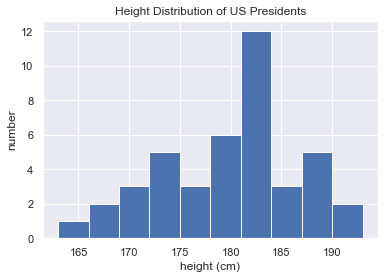

In [45]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

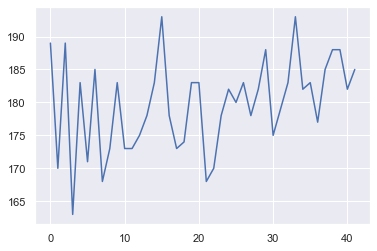

In [46]:
plt.plot(heights)


In [51]:
plt.scatter(prezydenci[order],prezydenci[height])

NameError: name 'prezydenci' is not defined

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.04-Computation-on-arrays-aggregates.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
